In [1]:
import rdkit
print(rdkit.__version__)
from rdkit import Chem
import numpy as np
import pandas as pd
from rdkit.Chem import AllChem, PandasTools

2021.03.2


In [2]:
'''
PubChem assays 743139 (Tox21) were selected from the assays that tested against CYP19A1.
'''

'\nPubChem assays 743139 (Tox21) were selected from the assays that tested against CYP19A1.\n'

In [3]:
# read in the two CSV files as pandas dataframes
df1 = pd.read_csv('./datasets/1_raw/AID_743139_datatable_active.csv')
df2 = pd.read_csv('./datasets/1_raw/AID_743139_datatable_inactive.csv')

df1_useful = df1.drop(index=range(0,3))
df1_useful2 = df1_useful[['PUBCHEM_EXT_DATASOURCE_SMILES','PUBCHEM_SID', 'PUBCHEM_ACTIVITY_OUTCOME']]

df2_useful = df2.drop(index=range(0,3))
df2_useful2 = df2_useful[['PUBCHEM_EXT_DATASOURCE_SMILES','PUBCHEM_SID', 'PUBCHEM_ACTIVITY_OUTCOME']]
print(len(df1_useful2), len(df2_useful2))
# merge the two dataframes on the common column(s)
df = pd.concat([df1_useful2, df2_useful2])

379 7562


In [4]:
df

,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME
3,CC(C)(C)C1=CC=C(C=C1)CN2CCN(CC2)C(C3=CC=CC=C3)...,144203574.0,Active
4,C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@H]2C[C...,144203575.0,Active
5,CC[C@@]12CCCN3[C@@H]1C4=C(CC3)C5=CC=CC=C5N4C(=...,144203611.0,Active
6,C1=CC=C(C=C1)C(C2=CC=CC=C2)(C3=CC=CC=C3Cl)N4C=...,144203662.0,Active
7,CC1=[N+](C2=CC=CC=C2C(=C1)N)CCCCCCCCCC[N+]3=C(...,144203679.0,Active
...,...,...,...
7560,CCCSP(=O)(OCC)SCCC,144214043.0,Inactive
7561,CCCCC(CC)COC(=O)C1=CC=CC=C1C(=O)OCC(CC)CCCC,144214045.0,Inactive
7562,CC(C)OC1=CC=CC(=C1)NC(=O)C2=CC=CC=C2C(F)(F)F,144214046.0,Inactive
7563,CCCCOCCOCCOCC1=CC2=C(C=C1CCC)OCO2,144214047.0,Inactive


In [5]:
df.dropna(subset = ['PUBCHEM_EXT_DATASOURCE_SMILES'],inplace=True)
len(df)

7844

In [6]:
import sys
sys.path.append('/home/sliu/cyp_related_coding/CYP19_inhibitor_screening/')
'''
The following function used for molecule preprocessing is from 'RingSySTEMS' project: https://github.com/anya-chen/RingSystems/tree/master/Preprocessing/src
'''
from src import MoleculePreprocessor
from src.MoleculePreprocessor import MoleculePreprocessor
from src.MoleculePreprocessorExtended import MoleculePreprocessorExtended

In [7]:
moleculesProcessed = MoleculePreprocessorExtended.init_with_smiles(list(df.PUBCHEM_EXT_DATASOURCE_SMILES))

RDKit ERROR: [18:32:45] Explicit valence for atom # 3 Si, 8, is greater than permitted
[18:32:45] Explicit valence for atom # 3 Si, 8, is greater than permitted
RDKit WARNING: [18:32:45] WARNING: not removing hydrogen atom without neighbors
[18:32:45] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [18:32:45] Explicit valence for atom # 1 Si, 8, is greater than permitted
[18:32:45] Explicit valence for atom # 1 Si, 8, is greater than permitted


In [8]:
moleculesProcessed.csp_wash()

In [9]:
preprocessedSmilesDict = moleculesProcessed.get_rawsmiles_smiles_dict()

In [10]:
preprocessedSmiles_df = pd.DataFrame(list(preprocessedSmilesDict.items()), columns=['rawSmiles','preprocessedSmiles'])


In [11]:
preprocessed_df = pd.merge(df, preprocessedSmiles_df, 
                           left_on='PUBCHEM_EXT_DATASOURCE_SMILES', right_on='rawSmiles')

In [12]:
preprocessed_df.dropna(subset=['preprocessedSmiles'],inplace=True) 

In [13]:
preprocessed_df = preprocessed_df[preprocessed_df['preprocessedSmiles']!='']

In [14]:
len(preprocessed_df)

3047

In [15]:
def remove_stereochemistry(smiles):
    # Convert the SMILES string to an RDKit molecule object
    mol = Chem.MolFromSmiles(smiles)
    
    # Use the Chem.RemoveStereochemistry function to remove stereo informationz
    Chem.RemoveStereochemistry(mol)
    
    # Convert the molecule back to a SMILES string without stereochemistry
    return Chem.MolToSmiles(mol)

preprocessed_df['preprocessedSmiles'] = preprocessed_df['preprocessedSmiles'].apply(remove_stereochemistry)
preprocessed_df

,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME,rawSmiles,preprocessedSmiles
0,CC(C)(C)C1=CC=C(C=C1)CN2CCN(CC2)C(C3=CC=CC=C3)...,144203574.0,Active,CC(C)(C)C1=CC=C(C=C1)CN2CCN(CC2)C(C3=CC=CC=C3)...,CC(C)(C)c1ccc(CN2CCN(C(c3ccccc3)c3ccc(Cl)cc3)C...
1,C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@H]2C[C...,144203575.0,Active,C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@H]2C[C...,CC1OC(OC2CC(O)C3(CO)C4C(O)CC5(C)C(c6coc(O)c6)C...
2,C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@H]2C[C...,144205610.0,Active,C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@H]2C[C...,CC1OC(OC2CC(O)C3(CO)C4C(O)CC5(C)C(c6coc(O)c6)C...
3,C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@H]2C[C...,144211864.0,Active,C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@H]2C[C...,CC1OC(OC2CC(O)C3(CO)C4C(O)CC5(C)C(c6coc(O)c6)C...
4,CC[C@@]12CCCN3[C@@H]1C4=C(CC3)C5=CC=CC=C5N4C(=...,144203611.0,Active,CC[C@@]12CCCN3[C@@H]1C4=C(CC3)C5=CC=CC=C5N4C(=...,CCC12CCCN3CCc4c(n(c5ccccc45)C(=O)C1)C32
...,...,...,...,...,...
7838,C1=C(C(=NC(=C1Cl)Cl)OCC(=O)O)Cl,144214034.0,Inactive,C1=C(C(=NC(=C1Cl)Cl)OCC(=O)O)Cl,O=C(O)COc1nc(Cl)c(Cl)cc1Cl
7839,CCCCC(CC)COC(=O)C1=CC=CC=C1C(=O)O,144214037.0,Inactive,CCCCC(CC)COC(=O)C1=CC=CC=C1C(=O)O,CCCCC(CC)COC(=O)c1ccccc1C(=O)O
7840,CCOP(=O)(NC(C)C)OC1=CC(=C(C=C1)SC)C,144214042.0,Inactive,CCOP(=O)(NC(C)C)OC1=CC(=C(C=C1)SC)C,CCOP(=O)(NC(C)C)Oc1ccc(SC)c(C)c1
7842,CCCCC(CC)COC(=O)C1=CC=CC=C1C(=O)OCC(CC)CCCC,144214045.0,Inactive,CCCCC(CC)COC(=O)C1=CC=CC=C1C(=O)OCC(CC)CCCC,CCCCC(CC)COC(=O)c1ccccc1C(=O)OCC(CC)CCCC


In [16]:
duplicates = preprocessed_df.duplicated('preprocessedSmiles', keep=False)

# Filter DataFrame to list duplicates with their information
duplicates_df = preprocessed_df[duplicates]
duplicates_df

,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME,rawSmiles,preprocessedSmiles
1,C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@H]2C[C...,144203575.0,Active,C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@H]2C[C...,CC1OC(OC2CC(O)C3(CO)C4C(O)CC5(C)C(c6coc(O)c6)C...
2,C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@H]2C[C...,144205610.0,Active,C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@H]2C[C...,CC1OC(OC2CC(O)C3(CO)C4C(O)CC5(C)C(c6coc(O)c6)C...
3,C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@H]2C[C...,144211864.0,Active,C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@H]2C[C...,CC1OC(OC2CC(O)C3(CO)C4C(O)CC5(C)C(c6coc(O)c6)C...
5,C1=CC=C(C=C1)C(C2=CC=CC=C2)(C3=CC=CC=C3Cl)N4C=...,144203662.0,Active,C1=CC=C(C=C1)C(C2=CC=CC=C2)(C3=CC=CC=C3Cl)N4C=...,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1
6,C1=CC=C(C=C1)C(C2=CC=CC=C2)(C3=CC=CC=C3Cl)N4C=...,144210733.0,Active,C1=CC=C(C=C1)C(C2=CC=CC=C2)(C3=CC=CC=C3Cl)N4C=...,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1
...,...,...,...,...,...
7683,CCCCCCCCCCCCOS(=O)(=O)O.C(CO)N(CCO)CCO,144213393.0,Inactive,CCCCCCCCCCCCOS(=O)(=O)O.C(CO)N(CCO)CCO,CCCCCCCCCCCCOS(=O)(=O)O
7734,CC1([C@H]([C@H]1C(=O)O[C@H](C#N)C2=CC(=CC=C2)O...,144213734.0,Inactive,CC1([C@H]([C@H]1C(=O)O[C@H](C#N)C2=CC(=CC=C2)O...,CC1(C)C(C=C(Cl)C(F)(F)F)C1C(=O)OC(C#N)c1cccc(O...
7752,C[C@]12CC[C@](C[C@H]1C3=CC(=O)[C@@H]4[C@]5(CC[...,144213802.0,Inactive,C[C@]12CC[C@](C[C@H]1C3=CC(=O)[C@@H]4[C@]5(CC[...,CC1(C(=O)O)CCC2(C)CCC3(C)C(=CC(=O)C4C5(C)CCC(O...
7773,COC1=CC2=C(C=CN=C2C=C1)[C@H]([C@@H]3C[C@@H]4CC...,144213870.0,Inactive,COC1=CC2=C(C=CN=C2C=C1)[C@H]([C@@H]3C[C@@H]4CC...,C=CC1CN2CCC1CC2C(O)c1ccnc2ccc(OC)cc12


In [17]:
groups = duplicates_df.groupby('preprocessedSmiles')
id_toremove = []
for name, group in groups:
    # Check if all values in 'activity_classification' are the same within the group
    if not group['PUBCHEM_ACTIVITY_OUTCOME'].nunique() == 1:
        # Print out 'Molecule ChEMBL ID' for all entries in the group
        print(f"Different activity classifications found for {name}:")
        for chembl_id in group['PUBCHEM_SID']:
            print(chembl_id)
            id_toremove.append(chembl_id)

Different activity classifications found for C#CC1(O)CCC2C3CC=C4CC(=O)CCC4C3CCC21CC:
144213928.0
144205146.0
144213960.0
Different activity classifications found for C#CC1(OC(C)=O)CCC2C3CCC4=CC(OC(C)=O)CCC4C3CCC21C:
144205886.0
144206477.0
Different activity classifications found for CC(C)C(=O)Nc1ccc([N+](=O)[O-])c(C(F)(F)F)c1:
144210854.0
144203705.0
Different activity classifications found for CC12CCC3c4ccc(O)cc4CCC3C1CCC2O:
144209255.0
144204699.0
144210608.0
Different activity classifications found for CCC(CC)Nc1c([N+](=O)[O-])cc(C)c(C)c1[N+](=O)[O-]:
144209094.0
144211184.0
Different activity classifications found for CCCCC(CC)COC(=O)C(C#N)=C(c1ccccc1)c1ccccc1:
144207434.0
144204704.0
Different activity classifications found for CCCCC1(COC(=O)CCC(=O)O)C(=O)N(c2ccccc2)N(c2ccccc2)C1=O:
144209550.0
144204166.0
144213095.0
Different activity classifications found for CCCCCCCCC(=O)NCc1ccc(O)c(OC)c1:
144211535.0
144203853.0
Different activity classifications found for CCCCCCCCCCCCCCCCn1

In [18]:
print(len(id_toremove))
print(len(set(id_toremove)))

62
62


In [19]:
# Drop the rows involved in the printed ids
for i in set(id_toremove):
    preprocessed_df = preprocessed_df[preprocessed_df['PUBCHEM_SID'] != i]

In [20]:
# remove duplicate
preprocessed_df.drop_duplicates('preprocessedSmiles',inplace=True)

In [21]:
preprocessed_df

,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME,rawSmiles,preprocessedSmiles
0,CC(C)(C)C1=CC=C(C=C1)CN2CCN(CC2)C(C3=CC=CC=C3)...,144203574.0,Active,CC(C)(C)C1=CC=C(C=C1)CN2CCN(CC2)C(C3=CC=CC=C3)...,CC(C)(C)c1ccc(CN2CCN(C(c3ccccc3)c3ccc(Cl)cc3)C...
1,C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@H]2C[C...,144203575.0,Active,C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@H]2C[C...,CC1OC(OC2CC(O)C3(CO)C4C(O)CC5(C)C(c6coc(O)c6)C...
4,CC[C@@]12CCCN3[C@@H]1C4=C(CC3)C5=CC=CC=C5N4C(=...,144203611.0,Active,CC[C@@]12CCCN3[C@@H]1C4=C(CC3)C5=CC=CC=C5N4C(=...,CCC12CCCN3CCc4c(n(c5ccccc45)C(=O)C1)C32
5,C1=CC=C(C=C1)C(C2=CC=CC=C2)(C3=CC=CC=C3Cl)N4C=...,144203662.0,Active,C1=CC=C(C=C1)C(C2=CC=CC=C2)(C3=CC=CC=C3Cl)N4C=...,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1
7,CC1=[N+](C2=CC=CC=C2C(=C1)N)CCCCCCCCCC[N+]3=C(...,144203679.0,Active,CC1=[N+](C2=CC=CC=C2C(=C1)N)CCCCCCCCCC[N+]3=C(...,Cc1cc(N)c2ccccc2[n+]1CCCCCCCCCC[n+]1c(C)cc(N)c...
...,...,...,...,...,...
7838,C1=C(C(=NC(=C1Cl)Cl)OCC(=O)O)Cl,144214034.0,Inactive,C1=C(C(=NC(=C1Cl)Cl)OCC(=O)O)Cl,O=C(O)COc1nc(Cl)c(Cl)cc1Cl
7839,CCCCC(CC)COC(=O)C1=CC=CC=C1C(=O)O,144214037.0,Inactive,CCCCC(CC)COC(=O)C1=CC=CC=C1C(=O)O,CCCCC(CC)COC(=O)c1ccccc1C(=O)O
7840,CCOP(=O)(NC(C)C)OC1=CC(=C(C=C1)SC)C,144214042.0,Inactive,CCOP(=O)(NC(C)C)OC1=CC(=C(C=C1)SC)C,CCOP(=O)(NC(C)C)Oc1ccc(SC)c(C)c1
7842,CCCCC(CC)COC(=O)C1=CC=CC=C1C(=O)OCC(CC)CCCC,144214045.0,Inactive,CCCCC(CC)COC(=O)C1=CC=CC=C1C(=O)OCC(CC)CCCC,CCCCC(CC)COC(=O)c1ccccc1C(=O)OCC(CC)CCCC


In [22]:
# Identify duplicates based on the 'ID' column
duplicates = preprocessed_df.duplicated('preprocessedSmiles', keep=False)

# Filter DataFrame to list duplicates with their information
duplicates_df = preprocessed_df[duplicates]
duplicates_df

,PUBCHEM_EXT_DATASOURCE_SMILES,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME,rawSmiles,preprocessedSmiles


In [23]:
len(preprocessed_df[preprocessed_df['PUBCHEM_ACTIVITY_OUTCOME']=='Active'])

199

In [24]:
len(preprocessed_df[preprocessed_df['PUBCHEM_ACTIVITY_OUTCOME']=='Inactive'])

2204

In [25]:
preprocessed_df_useful = preprocessed_df[['preprocessedSmiles','PUBCHEM_SID', 'PUBCHEM_ACTIVITY_OUTCOME']]
preprocessed_df_useful

,preprocessedSmiles,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME
0,CC(C)(C)c1ccc(CN2CCN(C(c3ccccc3)c3ccc(Cl)cc3)C...,144203574.0,Active
1,CC1OC(OC2CC(O)C3(CO)C4C(O)CC5(C)C(c6coc(O)c6)C...,144203575.0,Active
4,CCC12CCCN3CCc4c(n(c5ccccc45)C(=O)C1)C32,144203611.0,Active
5,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,144203662.0,Active
7,Cc1cc(N)c2ccccc2[n+]1CCCCCCCCCC[n+]1c(C)cc(N)c...,144203679.0,Active
...,...,...,...
7838,O=C(O)COc1nc(Cl)c(Cl)cc1Cl,144214034.0,Inactive
7839,CCCCC(CC)COC(=O)c1ccccc1C(=O)O,144214037.0,Inactive
7840,CCOP(=O)(NC(C)C)Oc1ccc(SC)c(C)c1,144214042.0,Inactive
7842,CCCCC(CC)COC(=O)c1ccccc1C(=O)OCC(CC)CCCC,144214045.0,Inactive


In [26]:
# add rdKit mol object to the dataframe
PandasTools.AddMoleculeColumnToFrame(preprocessed_df_useful,'preprocessedSmiles','Molecule')

/home/sliu/miniconda3/envs/cypscreen/lib/python3.8/site-packages/rdkit/Chem/PandasTools.py:425: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


In [27]:
#Morgan2 FP
def get_morgan2(mol):
    return list(AllChem.GetMorganFingerprintAsBitVect(mol,2,nBits=2048))

In [28]:
import warnings

# Suppress specific performance warnings
warnings.filterwarnings('ignore', category=pd.errors.PerformanceWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

In [29]:
preprocessed_df_useful['fp'] = preprocessed_df_useful['Molecule'].apply(get_morgan2) #doesn't work if save the fp in one column, but check duplicates first

,preprocessedSmiles,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME,Molecule,fp
0,CC(C)(C)c1ccc(CN2CCN(C(c3ccccc3)c3ccc(Cl)cc3)C...,144203574.0,Active,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CC1OC(OC2CC(O)C3(CO)C4C(O)CC5(C)C(c6coc(O)c6)C...,144203575.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CCC12CCCN3CCc4c(n(c5ccccc45)C(=O)C1)C32,144203611.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,144203662.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,Cc1cc(N)c2ccccc2[n+]1CCCCCCCCCC[n+]1c(C)cc(N)c...,144203679.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
7838,O=C(O)COc1nc(Cl)c(Cl)cc1Cl,144214034.0,Inactive,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7839,CCCCC(CC)COC(=O)c1ccccc1C(=O)O,144214037.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7840,CCOP(=O)(NC(C)C)Oc1ccc(SC)c(C)c1,144214042.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7842,CCCCC(CC)COC(=O)c1ccccc1C(=O)OCC(CC)CCCC,144214045.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

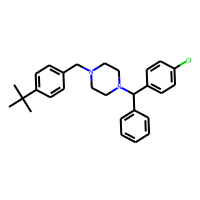
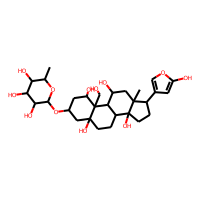
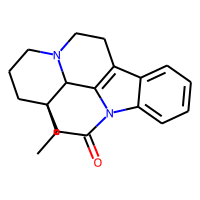
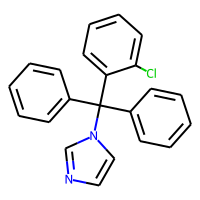
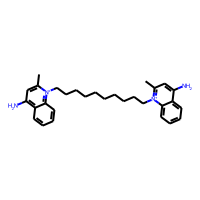
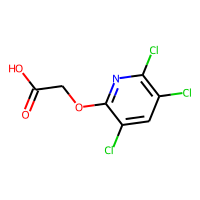
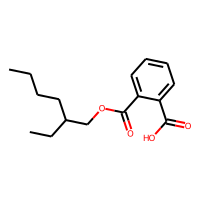
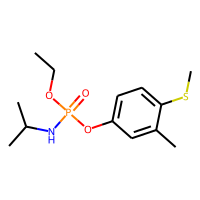
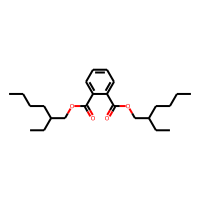
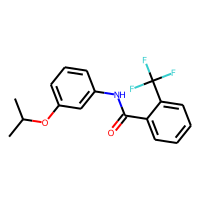

In [30]:
preprocessed_df_useful

In [31]:
def find_duplicates_with_labels(dataframe, fingerprint_col, label_col):
    # Initialize dictionary to hold fingerprints and their respective indices and labels
    fingerprint_dict = {}

    # Iterate through DataFrame rows
    for index, row in dataframe.iterrows():
        fp_tuple = tuple(row[fingerprint_col])
        label = row[label_col]

        # Update dictionary with index and label for each fingerprint
        if fp_tuple not in fingerprint_dict:
            fingerprint_dict[fp_tuple] = {'indices': [index], 'labels': [label]}
        else:
            fingerprint_dict[fp_tuple]['indices'].append(index)
            fingerprint_dict[fp_tuple]['labels'].append(label)

    # Identify duplicates: those with more than one index and check labels
    duplicates = {}
    for fp, details in fingerprint_dict.items():
        if len(details['indices']) > 1:
            # Check if all labels for these indices are the same
            if len(set(details['labels'])) == 1:
                duplicates[fp] = {'indices': details['indices'], 'labels': details['labels'][0], 'identical_labels': True}
            else:
                duplicates[fp] = {'indices': details['indices'], 'labels': set(details['labels']), 'identical_labels': False}

    return duplicates


In [32]:
import pandas as pd

def classify_duplicates(dataframe, fingerprint_col, label_col):
    fingerprint_dict = {}
    for index, row in dataframe.iterrows():
        fp_tuple = tuple(row[fingerprint_col])
        label = row[label_col]
        if fp_tuple not in fingerprint_dict:
            fingerprint_dict[fp_tuple] = {'indices': [index], 'labels': [label]}
        else:
            fingerprint_dict[fp_tuple]['indices'].append(index)
            fingerprint_dict[fp_tuple]['labels'].append(label)

    identical = []
    non_identical = []

    for fp, details in fingerprint_dict.items():
        if len(details['indices']) > 1:
            if len(set(details['labels'])) == 1:
                identical.extend(details['indices'][1:])
            else:
                non_identical.extend(details['indices'])

    return identical, non_identical

,preprocessedSmiles,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME,Molecule,fp,y_true_label
0,CC(C)(C)c1ccc(CN2CCN(C(c3ccccc3)c3ccc(Cl)cc3)C...,144203574.0,Active,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
1,CC1OC(OC2CC(O)C3(CO)C4C(O)CC5(C)C(c6coc(O)c6)C...,144203575.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
4,CCC12CCCN3CCc4c(n(c5ccccc45)C(=O)C1)C32,144203611.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
5,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,144203662.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
7,Cc1cc(N)c2ccccc2[n+]1CCCCCCCCCC[n+]1c(C)cc(N)c...,144203679.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
...,...,...,...,...,...,...
7838,O=C(O)COc1nc(Cl)c(Cl)cc1Cl,144214034.0,Inactive,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
7839,CCCCC(CC)COC(=O)c1ccccc1C(=O)O,144214037.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
7840,CCOP(=O)(NC(C)C)Oc1ccc(SC)c(C)c1,144214042.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
7842,CCCCC(CC)COC(=O)c1ccccc1C(=O)OCC(CC)CCCC,144214045.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0

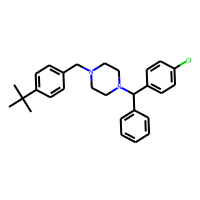
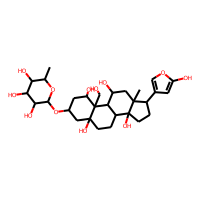
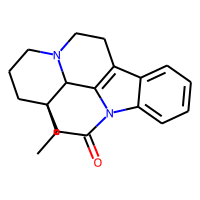
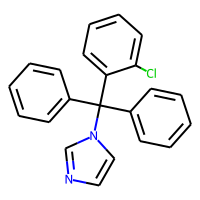
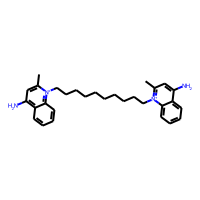
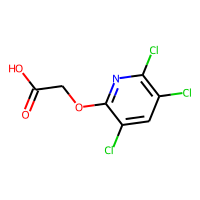
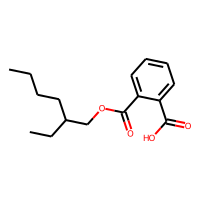
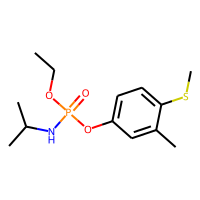
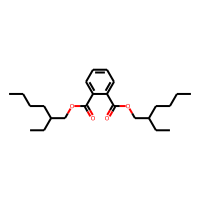
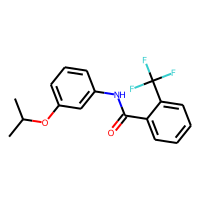

In [33]:
preprocessed_df_useful.loc[preprocessed_df_useful['PUBCHEM_ACTIVITY_OUTCOME']== 'Active', 'y_true_label'] = 1
preprocessed_df_useful.loc[preprocessed_df_useful['PUBCHEM_ACTIVITY_OUTCOME']== 'Inactive', 'y_true_label'] = 0
preprocessed_df_useful

In [34]:
# Usage of the function
duplicates = find_duplicates_with_labels(preprocessed_df_useful, 'fp', 'y_true_label')

# Output results
if duplicates:
    print("Duplicates found:")
    for fp, info in duplicates.items():
        print(f"Fingerprint {fp} appears at rows {info['indices']} with labels {info['labels']} - Identical Labels: {info['identical_labels']}")
else:
    print("No duplicates found.")

Duplicates found:
Fingerprint (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

,preprocessedSmiles,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME,Molecule,fp,y_true_label
0,CC(C)(C)c1ccc(CN2CCN(C(c3ccccc3)c3ccc(Cl)cc3)C...,144203574.0,Active,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
1,CC1OC(OC2CC(O)C3(CO)C4C(O)CC5(C)C(c6coc(O)c6)C...,144203575.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
4,CCC12CCCN3CCc4c(n(c5ccccc45)C(=O)C1)C32,144203611.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
5,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,144203662.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
7,Cc1cc(N)c2ccccc2[n+]1CCCCCCCCCC[n+]1c(C)cc(N)c...,144203679.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0
...,...,...,...,...,...,...
7838,O=C(O)COc1nc(Cl)c(Cl)cc1Cl,144214034.0,Inactive,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
7839,CCCCC(CC)COC(=O)c1ccccc1C(=O)O,144214037.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
7840,CCOP(=O)(NC(C)C)Oc1ccc(SC)c(C)c1,144214042.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0
7842,CCCCC(CC)COC(=O)c1ccccc1C(=O)OCC(CC)CCCC,144214045.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0

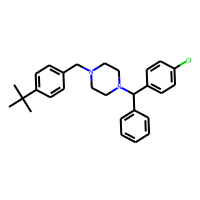
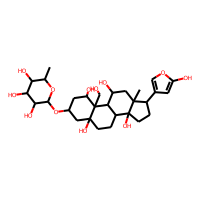
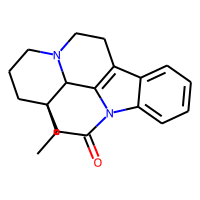
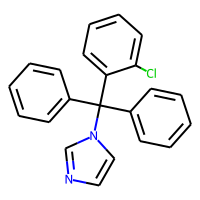
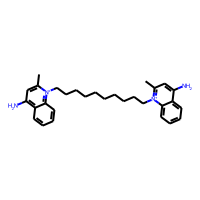
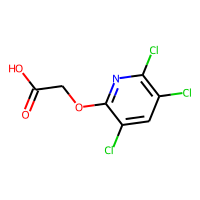
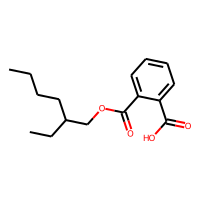
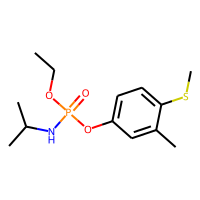
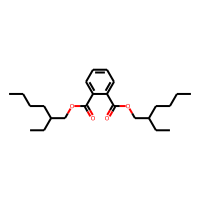
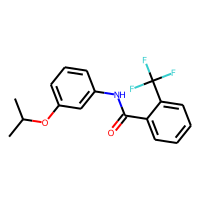

In [35]:
# Classify duplicates
identical_indices, non_identical_indices = classify_duplicates(preprocessed_df_useful, 'fp', 'y_true_label')

# Drop non-identical labels completely and identical label duplicates keeping the first occurrence
df_cleaned = preprocessed_df_useful.drop(index=non_identical_indices + identical_indices)
df_cleaned

In [36]:
morgan2_cols = ['morgan2_b'+str(i) for i in list(range(2048))]
df_cleaned[morgan2_cols] = df_cleaned.fp.to_list()

,preprocessedSmiles,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME,Molecule,fp,y_true_label,morgan2_b0,morgan2_b1,morgan2_b2,morgan2_b3,...,morgan2_b2038,morgan2_b2039,morgan2_b2040,morgan2_b2041,morgan2_b2042,morgan2_b2043,morgan2_b2044,morgan2_b2045,morgan2_b2046,morgan2_b2047
0,CC(C)(C)c1ccc(CN2CCN(C(c3ccccc3)c3ccc(Cl)cc3)C...,144203574.0,Active,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CC1OC(OC2CC(O)C3(CO)C4C(O)CC5(C)C(c6coc(O)c6)C...,144203575.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CCC12CCCN3CCc4c(n(c5ccccc45)C(=O)C1)C32,144203611.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,144203662.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Cc1cc(N)c2ccccc2[n+]1CCCCCCCCCC[n+]1c(C)cc(N)c...,144203679.0,Active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2343,O=C(O)COc1nc(Cl)c(Cl)cc1Cl,144214034.0,Inactive,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2344,CCCCC(CC)COC(=O)c1ccccc1C(=O)O,144214037.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2345,CCOP(=O)(NC(C)C)Oc1ccc(SC)c(C)c1,144214042.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2346,CCCCC(CC)COC(=O)c1ccccc1C(=O)OCC(CC)CCCC,144214045.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0

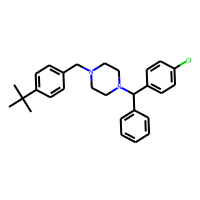
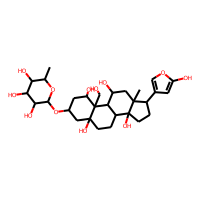
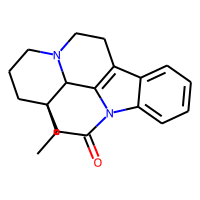
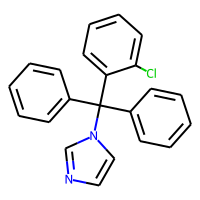
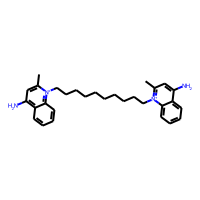
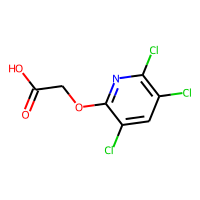
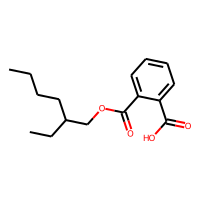
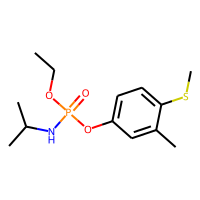
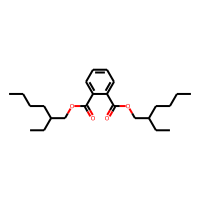
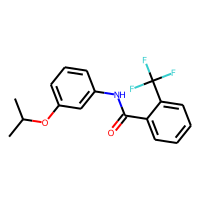

In [37]:
# reset index
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned

## generate RDKit 2D descriptors

In [38]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

PandasTools.AddMoleculeColumnToFrame(df_cleaned,'preprocessedSmiles','Molecule')
descriptors_list = [x[0] for x in Descriptors._descList]
print(descriptors_list)
print(len(descriptors_list))

['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'Slo

In [39]:
def compute_2Drdkit(mol):
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    ds = calc.CalcDescriptors(mol)
    return list(ds)


In [40]:
df_cleaned['descriptor'] = df_cleaned.Molecule.apply(compute_2Drdkit)
#one descriptor per column
calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
desc_cols = list(calc.GetDescriptorNames())
df_cleaned[desc_cols] = df_cleaned.descriptor.to_list()

In [41]:
df_cleaned[desc_cols].describe()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.0,...,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000,2348.000000
mean,11.158638,-1.313608,11.158638,0.216724,0.561531,375.497555,351.745589,374.996564,137.683135,0.0,...,0.076661,0.077939,0.015332,0.007666,0.010647,0.022147,0.000426,0.022998,0.716780,0.031942
std,2.718128,1.629048,2.718128,0.440219,0.230007,117.530416,110.646527,117.441558,46.208528,0.0,...,0.309074,0.303886,0.122897,0.087239,0.102657,0.155633,0.020637,0.163523,2.596141,0.183007
min,2.203562,-9.769375,2.203562,0.000000,0.026708,250.190000,216.198000,247.852088,26.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.713723,-1.805142,10.713723,0.045501,0.382515,293.358000,274.174000,293.085299,108.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.028653,-0.833173,12.028653,0.115404,0.598183,342.826500,322.075000,342.161654,126.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.752482,-0.246068,12.752482,0.246465,0.757555,415.551000,390.212750,414.304299,154.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.767970,1.369141,15.767970,8.764932,0.944994,899.128000,848.654000,898.507857,358.000000,0.0,...,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,26.000000,2.000000


In [42]:
df_cleaned[desc_cols].dropna(inplace=True)

In [43]:
df_cleaned[desc_cols].isnull().values.any()

False

In [44]:
actives = df_cleaned[df_cleaned['y_true_label']== 1]
inactives = df_cleaned[df_cleaned['y_true_label']== 0]

In [45]:
len(actives), len(inactives)

(196, 2152)

In [121]:
actives.to_csv('./datasets/2_preprocessed/pubchem_preprocessed_active.csv', index=False)
inactives.to_csv('./datasets/2_preprocessed/pubchem_preprocessed_inactive.csv', index=False)
df_cleaned.to_csv('./datasets/2_preprocessed/pubchem_preprocessed.csv', index=False)

In [46]:
#shuffel the data when train and test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_cleaned, test_size= 0.2, random_state=42)
print(len(train), len(test))

1878 470


In [48]:
# get number of actives and inactives for both splits
train_actives = train[train['y_true_label']==1]
train_inactives = train[train['y_true_label']==0]
test_actives = test[test['y_true_label']==1]
test_inactives = test[test['y_true_label']==0]
len(train_actives), len(train_inactives), len(test_actives), len(test_inactives)

(163, 1715, 33, 437)

In [128]:
# reset index
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

,preprocessedSmiles,PUBCHEM_SID,PUBCHEM_ACTIVITY_OUTCOME,Molecule,fp,y_true_label,morgan2_b0,morgan2_b1,morgan2_b2,morgan2_b3,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C#CC(C)(C)NC(=O)c1cc(Cl)cc(Cl)c1,144208611.0,Inactive,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CC[N+](CC)(CC)CCC(O)(c1ccccc1)C1CCCCC1,144204284.0,Inactive,,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CC(CN1c2ccccc2Sc2ccccc21)N(C)C,144203778.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CCOC(=O)c1c(N)sc2c1CCN(Cc1ccccc1)C2,144205231.0,Inactive,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,CCCNC(=O)NS(=O)(=O)c1ccc(Cl)cc1,144203653.0,Inactive,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1873,CC(=O)Oc1ccc(C2(c3ccc(OC(C)=O)cc3)Oc3ccccc3NC2...,144206872.0,Inactive,,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1874,CC(C)(C)NCC(O)c1cc(Cl)c(N)c(Cl)c1,144205569.0,Inactive,,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1875,CC1C(=O)OC2CCN3CC=C(COC(=O)C(C)(O)C1(C)O)C23,144205647.0,Inactive,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1876,Cc1ccccc1-n1c(C)nc2ccccc2c1=O,144206055.0,Inactive,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

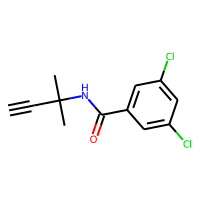
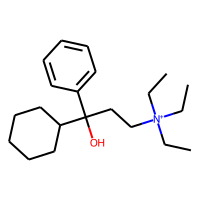
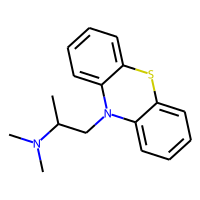
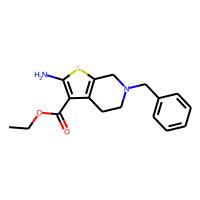
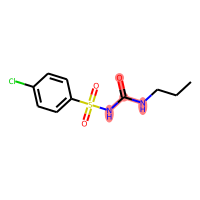
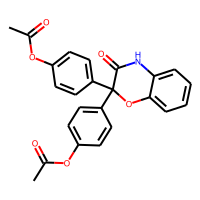
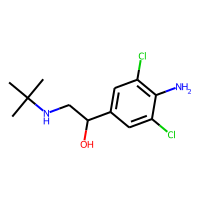
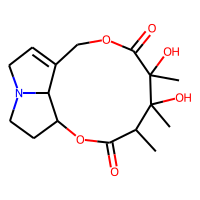
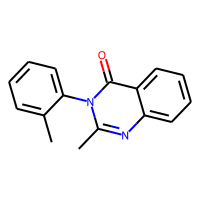
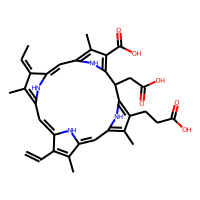

In [129]:
train

In [130]:
train.to_csv('./datasets/3_train_test_split/pubchem_train_ECFP4_rdkit2d.csv', index=False)
test.to_csv('./datasets/3_train_test_split/pubchem_test_ECFP4_rdkit2d.csv', index=False)

In [131]:
# save train and test data without features
#train_pure = train[['preprocessedSmiles','PUBCHEM_SID', 'PUBCHEM_ACTIVITY_OUTCOME', 'y_true_label']]
#test_pure = test[['preprocessedSmiles','PUBCHEM_SID', 'PUBCHEM_ACTIVITY_OUTCOME', 'y_true_label']]
#train_pure.to_csv('./datasets/3_train_test_split/pubchem_train.csv', index=False)
#test_pure.to_csv('./datasets/3_train_test_split/pubchem_test.csv', index=False)